<a href="https://colab.research.google.com/github/angelfpz127/Actividad-1/blob/main/Actividad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de Regresión lineal simple con Dataset de Airbnb Ciudad de México

In [1]:
#importar Librerías

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Leer datos

df=pd.read_csv('listings_Mexico.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20220922013610,2022-09-22,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,783480,https://www.airbnb.com/rooms/783480,20220922013610,2022-09-22,city scrape,"Area Sta.Fe,IberoABC Hospital Rooms",<b>The space</b><br />Two beautifully furnishe...,The neighborhood is very quiet. There are smal...,https://a0.muscache.com/pictures/12600230/eec8...,4129056,...,4.93,4.70,4.85,NaN,t,2,0,2,0,0.26
2,796477,https://www.airbnb.com/rooms/796477,20220922013610,2022-09-23,city scrape,Classic but Modern Apartment in Condesa,Spacious and comfortable room on historic buil...,Condesa is surrounded by important museums and...,https://a0.muscache.com/pictures/58251607/70e9...,4195771,...,4.91,4.96,4.71,NaN,f,1,0,1,0,1.52
3,44616,https://www.airbnb.com/rooms/44616,20220922013610,2022-09-23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.75,4.98,4.47,NaN,f,12,3,2,0,0.44
4,817291,https://www.airbnb.com/rooms/817291,20220922013610,2022-09-22,city scrape,Live Mexico City Like a Small Town,"Beautiful and cozy apartment in Mexico City, w...",Please check the guidebook. We have posted man...,https://a0.muscache.com/pictures/556d81f5-5aef...,4017148,...,4.95,4.63,4.78,NaN,f,1,1,0,0,0.51


In [22]:
#Solo tomamos las columnas de interés

df=df[['number_of_reviews', 'host_acceptance_rate', 'price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness','review_scores_communication', 'room_type']]
df.head()


,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,0,NaN,"$4,001.00",363,NaN,NaN,NaN,Entire home/apt
1,27,100%,$500.00,363,4.96,4.93,4.93,Private room
2,144,67%,$599.00,323,4.73,4.70,4.91,Private room
3,58,79%,"$18,000.00",331,4.59,4.70,4.75,Entire home/apt
4,61,100%,$740.00,314,4.85,4.80,4.95,Entire home/apt


In [23]:
print(df.shape) #Número de filas y columnas
Duplicadas=df.duplicated()  #Crea una serie 
print("\nNúmero de filas duplicadas:", Duplicadas[Duplicadas==True].count()) 

(22948, 8)

Número de filas duplicadas: 694


In [24]:
#Limpieza de filas repetidas
df.drop_duplicates(keep='first', inplace=True)
df.shape

(22254, 8)

In [25]:
#Identificar nulos
df.isnull().sum()

number_of_reviews                 0
host_acceptance_rate           2083
price                             0
availability_365                  0
review_scores_rating           3435
review_scores_cleanliness      3528
review_scores_communication    3528
room_type                         0
dtype: int64

In [26]:
df.dropna(axis=0, how='any', inplace=True)
df.shape

(17677, 8)

In [27]:
#Quitamos % y $ en las columnas correspondiente
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


number_of_reviews                int64
host_acceptance_rate            object
price                           object
availability_365                 int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
room_type                       object
dtype: object

In [28]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype('int64')
df["price"] = df["price"].astype('float64')
df.dtypes

number_of_reviews                int64
host_acceptance_rate             int64
price                          float64
availability_365                 int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
room_type                       object
dtype: object

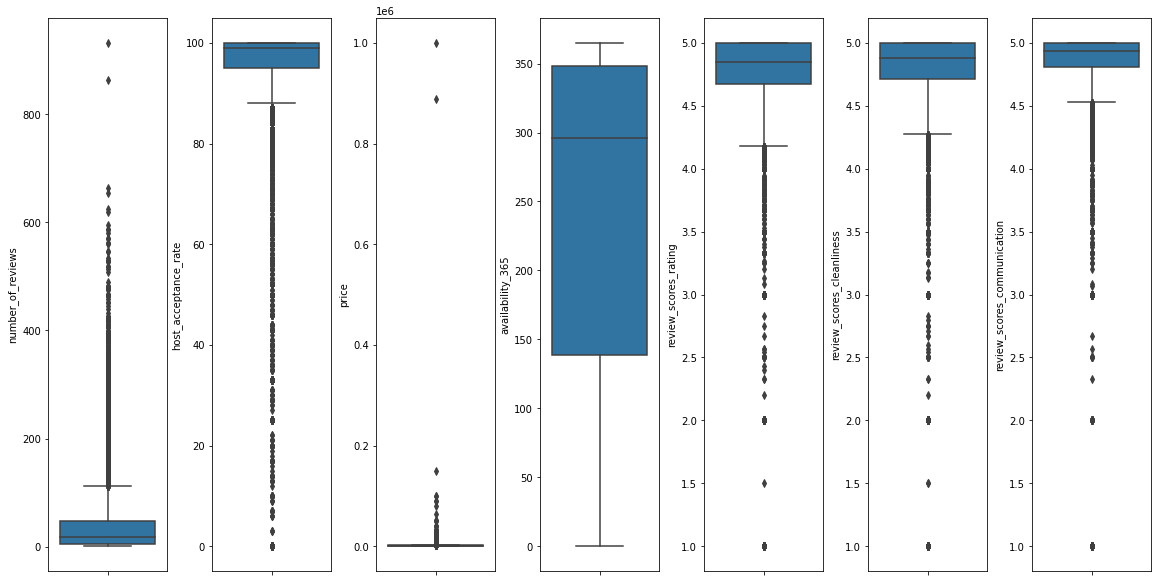

In [33]:
fig, axs = plt.subplots(ncols=7, figsize=(16,8))
index=0
axs=axs.flatten()
copiadf=df.copy()
copiadf=copiadf.drop('room_type', axis=1)
for k, v in copiadf.items(): # k variable, v valores
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4)

Se observan valores atípicos muy marcados en el precio por encima de 0.2 x10^6, que pueden llegar a afectar a nuestro modelo, además de ser muy pocos, pueden ser habitaciones muy caras poco rentadas que no resumen de manera adecuada a nuestros datos.
En el caso del review score rating vemos calificaciones muuy bajas menores a 2.5, que aunque tienen sentido, ya que un cliente se pudo haber llevado una experiencias muy mala como para poner un calificación muy baja. Son realemente pocas y pueden no describir de manera correcta a los datos.
En el caso de número de reviews vemos valores extremadamente altos, que pueden corresponder a habitaciones muy rentadas, pero que estas pueden afectar a nuestro modelo.

In [46]:
df=df[df['number_of_reviews']<400]
df=df[df['host_acceptance_rate']>50]
df=df[df['price']<8000]
df=df[df['review_scores_rating']>4.0]
df=df[df['review_scores_cleanliness']>4.0]
df=df[df['review_scores_communication']>4.0]


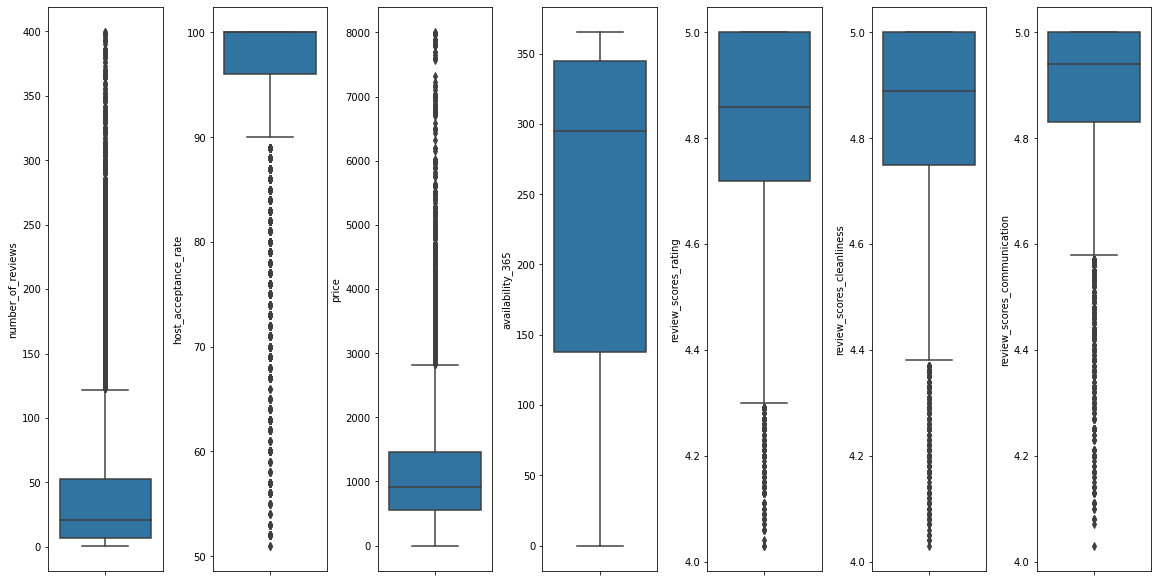

In [47]:
fig, axs = plt.subplots(ncols=7, figsize=(16,8))
index=0
axs=axs.flatten()
copiadf=df.copy()
copiadf=copiadf.drop('room_type', axis=1)
for k, v in copiadf.items(): # k variable, v valores
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4)

In [48]:
#División en 3 DataFrames

df_Home=df[df['room_type']=='Entire home/apt']
df_Room=df[df['room_type']=='Private room']
df_Shared=df[df['room_type']=='Shared room']

print(df_Home.shape)
print(df_Room.shape)
print(df_Shared.shape)

(10619, 8)
(4485, 8)
(135, 8)


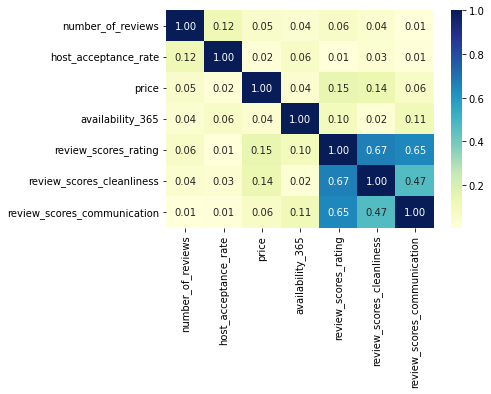

In [49]:
#Mapa de correlaciones
Corr_Factors=df_Home.corr()
Corr_Factors_abs= abs(Corr_Factors)
Heat_Map=sns.heatmap(Corr_Factors_abs, cmap='YlGnBu', annot=True, fmt='.2f')
Heat_Map

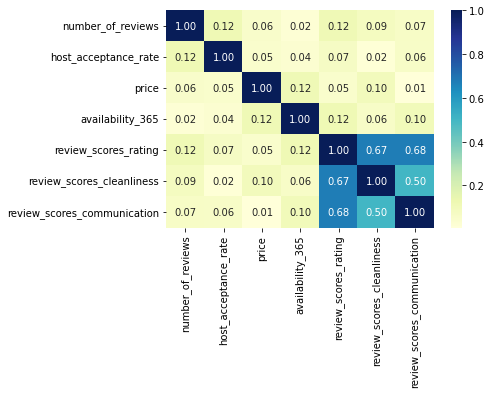

In [50]:
#Mapa de correlaciones
Corr_Factors=df_Room.corr()
Corr_Factors_abs= abs(Corr_Factors)
Heat_Map=sns.heatmap(Corr_Factors_abs, cmap='YlGnBu', annot=True, fmt='.2f')
Heat_Map

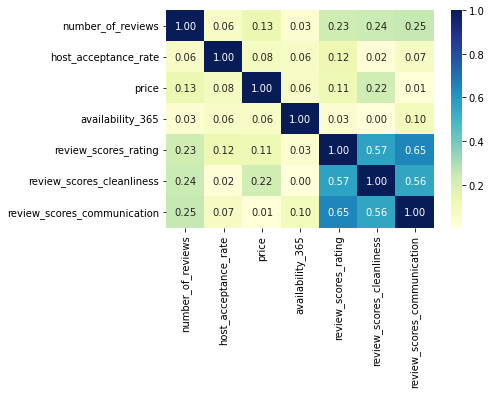

In [51]:
#Mapa de correlaciones
Corr_Factors=df_Shared.corr()
Corr_Factors_abs= abs(Corr_Factors)
Heat_Map=sns.heatmap(Corr_Factors_abs, cmap='YlGnBu', annot=True, fmt='.2f')
Heat_Map